In [17]:
# create model system (polynomial)
# generate learning curves for different sigmas

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.model_selection as sk
import scipy as sc

In [19]:
# create model system
x = np.linspace(0, 10, 10000)

a3 = 0.01
a2 = 0.01
a1 = 1
a0 = 0
y = a3*np.power(x,3)*np.sin(x) + a2*np.power(x,2) + a1*x + a0

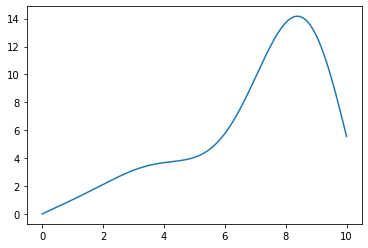

In [20]:
plt.plot(x, y)

In [21]:
# KRR
set_sizes = np.logspace(0, 11, 12, base = 2).astype(int)
num_cv = 3
sigmas = [1e-3, 1e-2, 1e-1 , 1, 10, 100]
lam_val = 1e-10


mae_sigma = {el:[] for el in sigmas}

for tr_size in set_sizes:
    print(tr_size)
    me_sigma_set_size = {el:[] for el in sigmas}
    for cv in range(num_cv):
        # sample selection
        reps_tr, reps_test, labels_tr, labels_test = sk.train_test_split(x,y, train_size=tr_size)
        # training kernel
        # make distance matrix and kernel
        reps_tr_shaped = reps_tr.reshape((len(reps_tr), 1))
        d_mat_tr = sc.spatial.distance_matrix(reps_tr_shaped, reps_tr_shaped)

        for sigma in sigmas:
            kernel_tr = np.exp(-np.power(d_mat_tr, 2)/sigma**2)
            kernel_tr = kernel_tr + np.identity(len(kernel_tr))*lam_val
            # get coefficients
            kernel_tr_inv = np.linalg.inv(kernel_tr)
            coeffs = np.dot(kernel_tr_inv, labels_tr)

            # test kernel
            reps_test_shaped = reps_test.reshape((len(reps_test),1))
            d_mat_test_tr = sc.spatial.distance_matrix(reps_test_shaped, reps_tr_shaped)
            kernel_test_tr = np.exp(-np.power(d_mat_test_tr, 2)/sigma**2)
            label_predicted = np.dot(kernel_test_tr, coeffs)

            errors = np.abs(labels_test - label_predicted)
            me_sigma_set_size[sigma].append(errors.mean())

    for k in me_sigma_set_size.keys():
        mae_sigma[k].append((np.array(me_sigma_set_size[k])).mean())

1
2
4
8
16
32
64
128
256
512
1024
2048


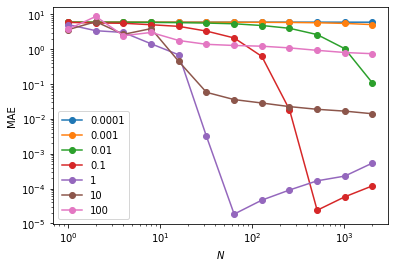

In [22]:
# plot learning curves
fig, ax = plt.subplots(1,1)
for k in mae_sigma.keys():
    ax.plot(set_sizes, mae_sigma[k], '-o', label = k)
ax.set_xlabel(r'$N$')
ax.set_ylabel('MAE')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()